In [1]:
import cv2, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap='gray')
    plt.show()

(512, 512)
(512, 512, 3)
2
3


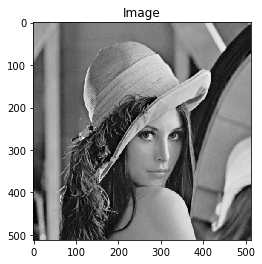

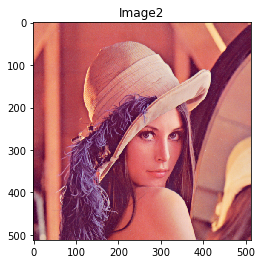

In [2]:
image = cv2.imread('Lena.png', 0)  # 0 은 흑백으로 읽으라는 뜻
image2 = cv2.imread('Lena.png')

print(image.shape)
print(image2.shape)
print(len(image.shape))
print(len(image2.shape))

# cv2.imread(fileName, flag) : fileName은 이미지 파일의 경로를 의미하고 flag는 이미지 파일을 읽을 때 옵션입니다

# flag는 총 3가지가 있습니다. 명시적으로 써줘도 되고 숫자를 사용해도 됩니다
# cv2.IMREAD_COLOR(1) : 이미지 파일을 Color로 읽음. 투명한 부분은 무시하며 Default 설정입니다
# cv2.IMREAD_GRAYSCALE(0) : 이미지 파일을 Grayscale로 읽음. 실제 이미지 처리시 중간 단계로 많이 사용합니다
# cv2.IMREAD_UNCHAGED(-1) : 이미지 파일을 alpha channel 까지 포함해 읽음



imshow("Image", image)
imshow("Image2", image2)

---

## 이미지 임계처리

이진화 처리는 간단하지만, 쉽지 않은 문제를 가지고 있다. **이진화**란 영상을 흑/백으로 분류하여 처리하는 것을 말합니다. 이때 기준이 되는 임계값을 어떻게 결정할 것인지가 중요한 문제가 됩니다. 임계값보다 크면 백, 작으면 흑이 됩니다. 기본 임계처리는 사용자가 고정된 임계값을 결정하고 그 결과를 보여주는 단순한 형태입니다.

이때 사용하는 함수가 **cv2.threshold()** 입니다.

cv2.threshold(*src, threshold_value, value, flag) → retval, dst

Parameters:	
- **src** – input image로 single-channel 이미지.(**grayscale** 이미지만 가능!!!)
- **threshold_value** – 임계값
- **value** – 임계값을 넘었을 때 적용할 value
- **flag** – thresholding type
    - *cv2.THRESH_BINARY* : threshold보다 크면 value이고 아니면 0으로 바꾸어 줍니다. 
    - *cv2.THRESH_BINARY_INV* : threshold보다 크면 0이고 아니면 value로 바꾸어 줍니다. 
    - *cv2.THRESH_TRUNC* : threshold보다 크면 value로 지정하고 작으면 기존의 값 그대로 사용한다.
    - *cv2.THRESH_TOZERO* : treshold_value보다 크면 픽셀 값 그대로 작으면 0으로 할당한다.
    - *cv2.THRESH_TOZERO_INV* : threshold_value보다 크면 0으로 작으면 그대로 할당해준다. 

------------------------------------------------------
Return Values :
- **retval** : 입력한 임계값(threshold_value)
- **dst** : 임계값 이미지





### cv2.threshold( , , , *cv2.THRESH_BINARY*)

Threshold used :  127.0
Result :  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


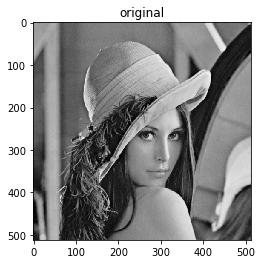

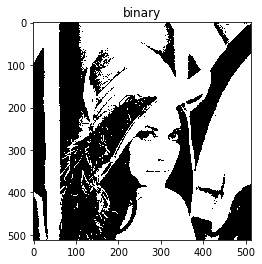

In [3]:
thr, mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

print('Threshold used : ', thr)
print('Result : ', mask)

imshow("original", image)
imshow("binary", mask)

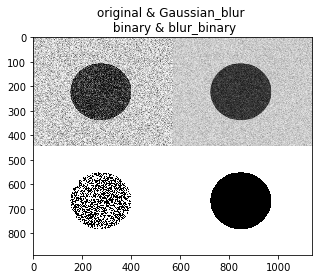

In [4]:
image = cv2.imread('circle.png', 0)
_,binary = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)  # 임계값(thresh)를 잘 찾는 것이 중요한데 찾기 어려움....
                                                            # _는 굳이 저장할 필요가 없는 불필요 요소를 지정해주지 않으려고 씀
image_blur = cv2.GaussianBlur(image, (5,5), 0)
_, image_blur_binary = cv2.threshold(image_blur, 127, 255, cv2.THRESH_BINARY)



imshow("original & Gaussian_blur \n binary & blur_binary", 
       np.vstack([np.hstack([image, image_blur]), 
                      np.hstack([binary, image_blur_binary]) ]) )


# imshow("", np.hstack([binary, binary_blur]))

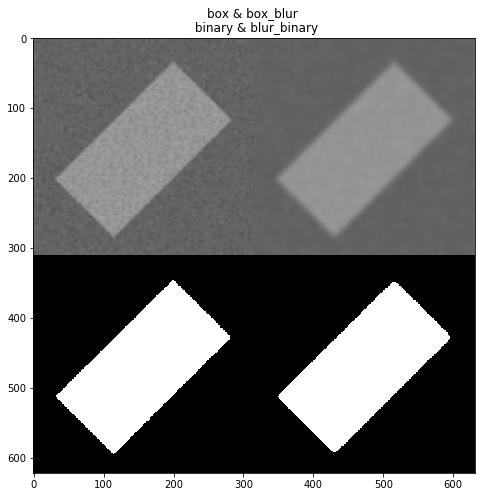

In [5]:
box = cv2.imread('boxnoise.png', 0)
_,binary = cv2.threshold(box, 127, 255, cv2.THRESH_BINARY)  # thresh를 어떻게 조정하느냐에 따라서 노이즈가 끼는 경우도 있고 없는 경우도 있음

box_blur = cv2.GaussianBlur(box, (21,21), 0)
_, box_blur_binary = cv2.threshold(box_blur, 127, 255, cv2.THRESH_BINARY)


fig=plt.figure(figsize=(15,8))
imshow("box & box_blur \n binary & blur_binary", np.vstack([np.hstack([box, box_blur]), np.hstack([binary, box_blur_binary])]))

---

### cv2.threshold( , , , *cv2.THRESH_BINARY + cv2.THRESH_OTSU*)
otsu의 이진화는 다음과 같은 과정에서 그레이스케일 이미지의 임계값을 추정함
1. [bimodal image](https://ko.wikipedia.org/wiki/%EB%8B%A4%EB%B4%89%EB%B6%84%ED%8F%AC)를 이진화
2. 원본 이미지를 바이너리 마스크로 변환
3. 두 클래스의 전체 클래스 내부 분산을 최소화 하는 방식으로


**참고 (정확한 원리)** 

- [원문](http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html)
- [번역문](https://j07051.tistory.com/364)

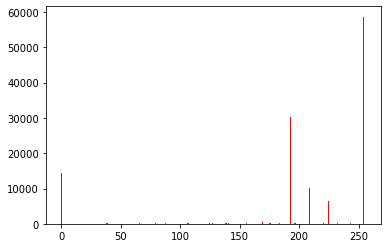

10.0


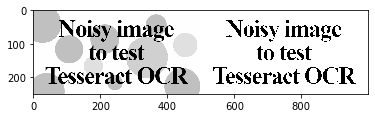

20.0


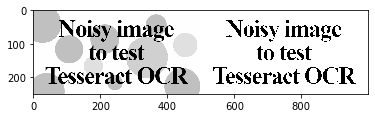

30.0


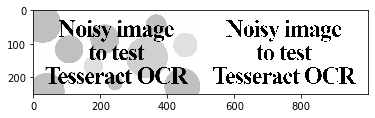

40.0


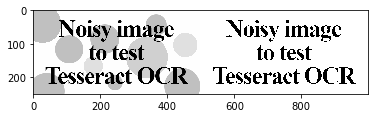

50.0


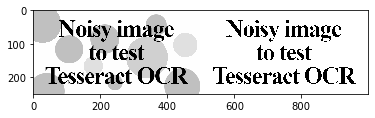

60.0


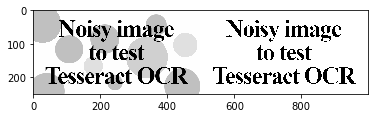

70.0


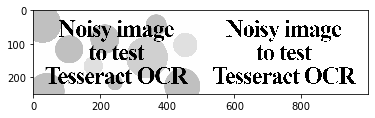

80.0


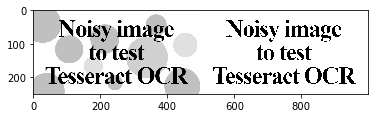

90.0


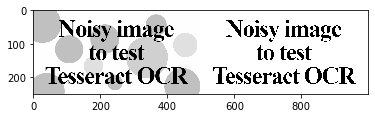

100.0


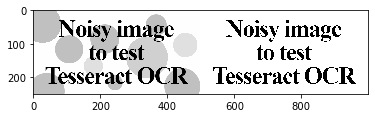

110.0


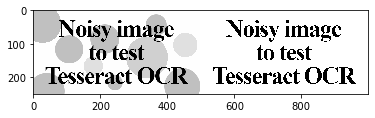

120.0


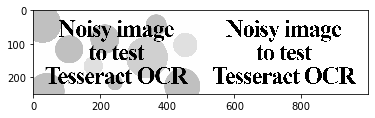

130.0


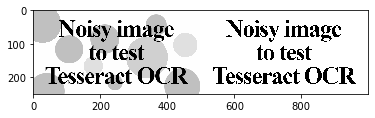

140.0


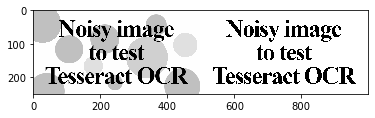

150.0


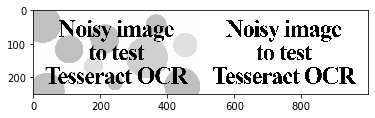

160.0


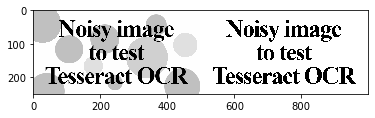

170.0


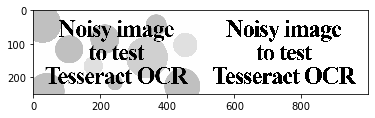

180.0


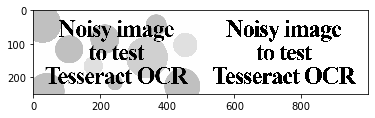

190.0


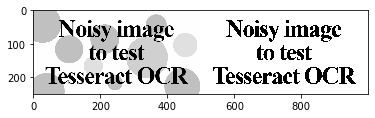

200.0


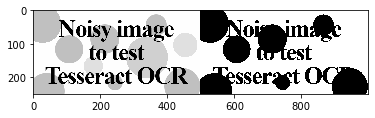

210.0


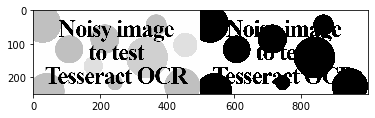

220.0


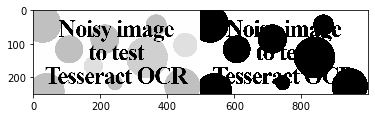

230.0


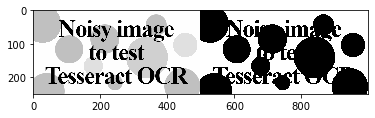

240.0


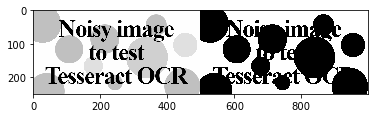

250.0


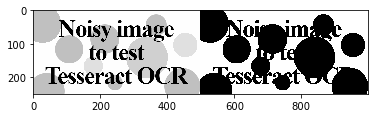

In [6]:
ocr = cv2.imread('ocr.png', 0)

plt.hist(ocr.ravel(), 256,[0,256], color='r')
plt.show()



# 이 때는 flag를 그냥 THRESH_BINARY로 써서 thresh값이 변함
for i in range(10,255,10) :
    _,ocr_binary = cv2.threshold(ocr, i, 255, 
                                    cv2.THRESH_BINARY)
    print(_)
    imshow("", np.hstack([ocr, ocr_binary]))

116.0


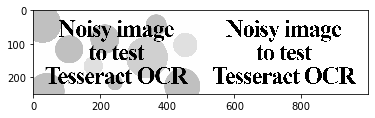

116.0


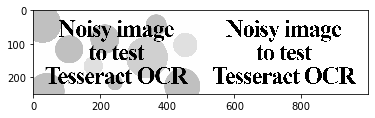

116.0


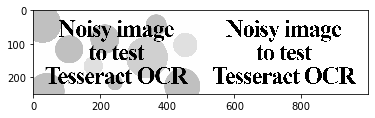

116.0


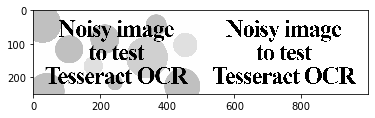

116.0


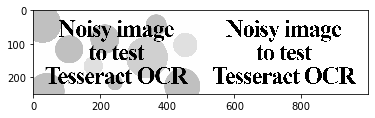

116.0


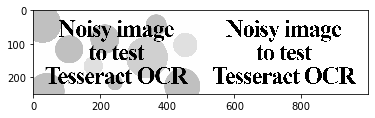

116.0


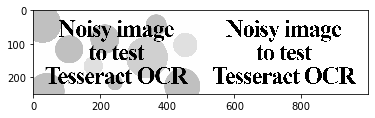

116.0


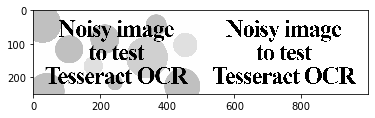

116.0


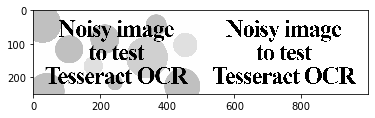

116.0


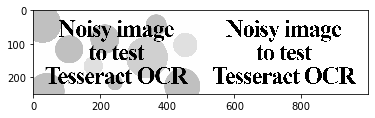

116.0


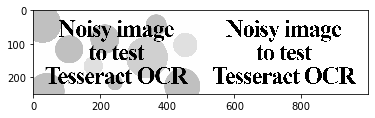

116.0


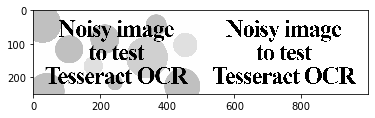

116.0


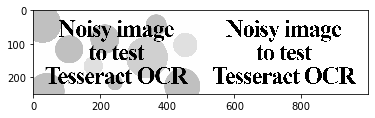

116.0


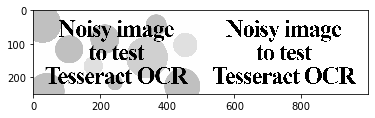

116.0


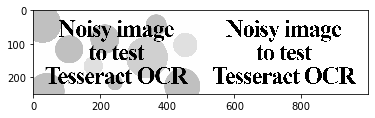

116.0


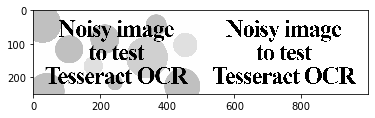

116.0


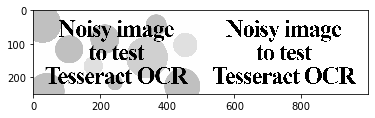

116.0


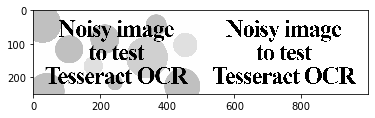

116.0


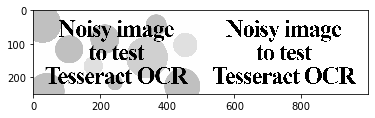

116.0


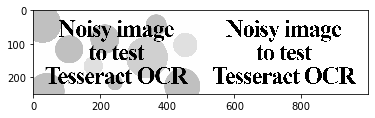

116.0


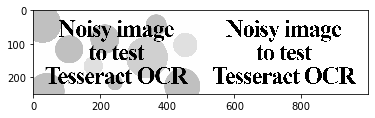

116.0


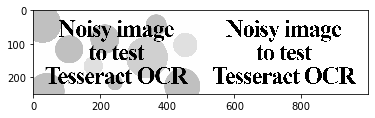

116.0


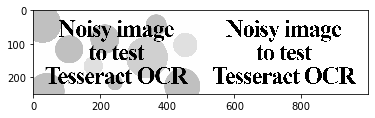

116.0


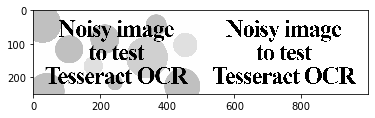

116.0


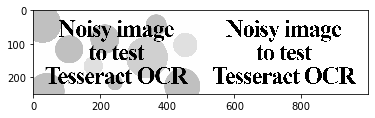

In [7]:
# 이 때는 flag를 THRESH_OTSU로 써서 
# 최적의 Thresh값이 구해졌기 때문에
# input parameter의 thresh값이 변해도 retval는 변하지 않음


for i in range(10,255,10) :
    _,ocr_binary = cv2.threshold(ocr, i, 255, 
                                    cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(_)
    imshow("", np.hstack([ocr, ocr_binary]))

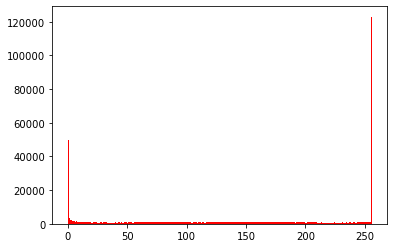

10.0


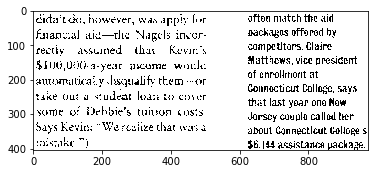

15.0


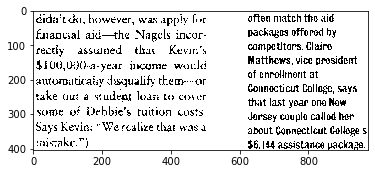

20.0


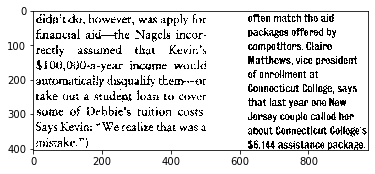

25.0


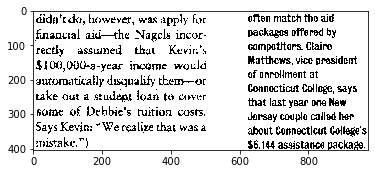

30.0


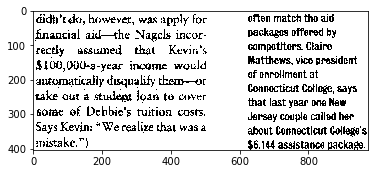

35.0


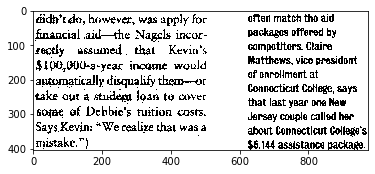

40.0


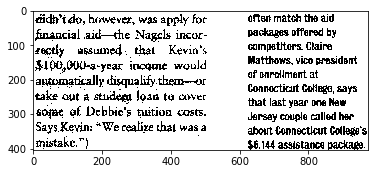

45.0


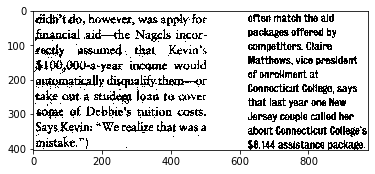

50.0


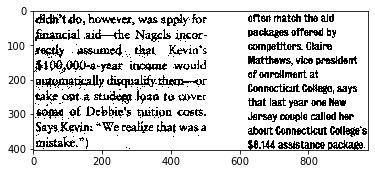

55.0


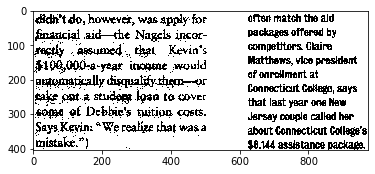

60.0


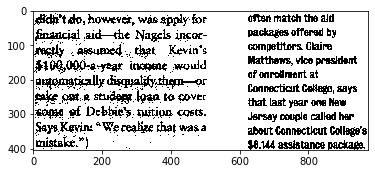

65.0


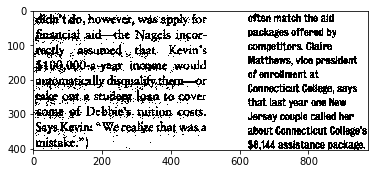

In [8]:
ocr2 = cv2.imread('ocr2.png', 0)

plt.hist(ocr2.ravel(), 256,[0,256], color='r')
plt.show()


ocr2_blur = cv2.GaussianBlur(ocr2, (3,3), 0)

for i in range(10,70,5):
    _,ocr2_binary = cv2.threshold(ocr2_blur, i, 255, 
                                  cv2.THRESH_BINARY)
    print(_)
    imshow("", ocr2_binary)

143.0


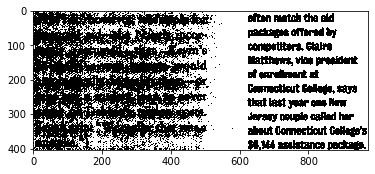

In [9]:
# 다음의 결과는 OTSU의 이진화 방식이 항상 좋은 것은 아님을 보여줌

_,ocr2_binary_ = cv2.threshold(ocr2_blur, 0, 255,
                              cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(_)
imshow("", ocr2_binary_)

---

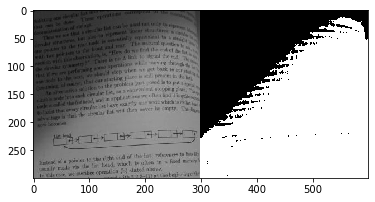

In [10]:
text = cv2.imread('text.jpg', 0)
text_blur = cv2.GaussianBlur(text, (3,3), 0)
_,text_blur_binary = cv2.threshold(text_blur, 80, 255, cv2.THRESH_BINARY)

# plt.hist(image.ravel(), 256,[0,256], color='r')



imshow("", np.hstack([text, text_blur_binary]))

## adaptiveThreshold
### cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
> 이전의 Threshold()함수는 임계값을 이미지 전체에 글로벌 조작을 적용하여 처리  
--> 하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 된다는 단점이 있음

이런 문제를 해결하기 위해서 이미지의 *작은 영역별*로 thresholding을 하는 것입니다.

- adaptiveThreshold는 블럭으로 나눠서 평균값을 구하고 평균보다 크면 전경/평균보다 작으면 배경으로 인식

- adaptive method 마다의 가중치
    - ADAPTIVE_THRESH_MEAN_C : 산술평균(1/n) 
    - ADAPTIVE_THRESH_GAUSSIAN_C : Gaussian curve(혹은 surface)에 따라 가중치

----
Parameters:	(순차적으로 보면 이해 안될 수도 있으니 밑에서부터 보길)
- **src** : grayscale image
- **maxValue** : adaptivemethod에 의해 계산된 임계값을 넘어갔을 때 thresholdType에 의해 픽셀에 적용될 값
- **adaptiveMethod** : thresholding value를 결정하는 계산 방법
    - **cv2.ADAPTIVE_THRESH_MEAN_C** : X, Y를 중심으로 (block Size * block Size) 안에 있는 픽셀 값의 평균에서 C를 뺀 값을 임계값으로 함 

    - **cv2.ADAPTIVE_THRESH_GAUSSIAN_C** : X, Y를 중심으로 (block Size * block Size) 안에 있는 Gaussian-weighted 합에서 C를 뺀 값을 임계값으로 한다. 

- **thresholdType** : threshold type
- **blockSize** : thresholding을 적용할 영역 사이즈(블록마다 한 변의 길이)
- **C** : 평균이나 가중평균에서 차감할 값(보정 상수로서 adaptive에 계산된 값에서 양수면 빼주고 음수면 더해준다.)

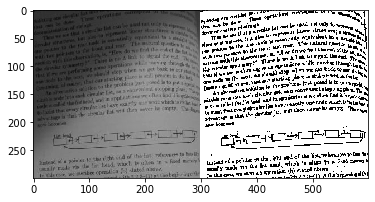

In [11]:
text = cv2.imread('text.jpg', 0)

text_adaptive_thr = cv2.adaptiveThreshold(text, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 21 ,5)   # 21은 블록의 사이즈로 수치가 클수록 사진을 더 잘게 나눔
                                                          # 2는 Gaussian의 평균을 2만큼 뺀 값으로 삼겠다는 것

# plt.hist(image.ravel(), 256,[0,256], color='r')


imshow("", np.hstack([text, text_adaptive_thr]))

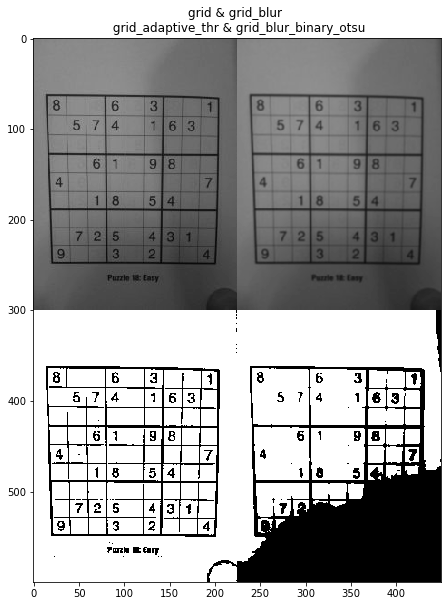

In [12]:
# 이 예제를 통해서 adaptivethreshold의 좋은 점을 확인할 수 있음

grid = cv2.imread('grid.jpg', 0)
grid_blur = cv2.GaussianBlur(grid, (3,3), 0)
_,grid_blur_binary_otsu = cv2.threshold(grid_blur, 0, 255, 
                                        cv2.THRESH_BINARY + cv2.THRESH_OTSU)
grid_adaptive_thr = cv2.adaptiveThreshold(grid, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 21, 4.5)   # 21은 블록의 사이즈로 수치가 클수록 사진을 더 잘게 나눔
                                                          # 2는 Gaussian의 평균을 2만큼 뺀 값으로 삼겠다는 것
fig=plt.figure(figsize=(20,10))
imshow("grid & grid_blur \n grid_adaptive_thr & grid_blur_binary_otsu", np.hstack([np.vstack([grid, grid_adaptive_thr]), 
                      np.vstack([grid_blur, grid_blur_binary_otsu]) ])  )

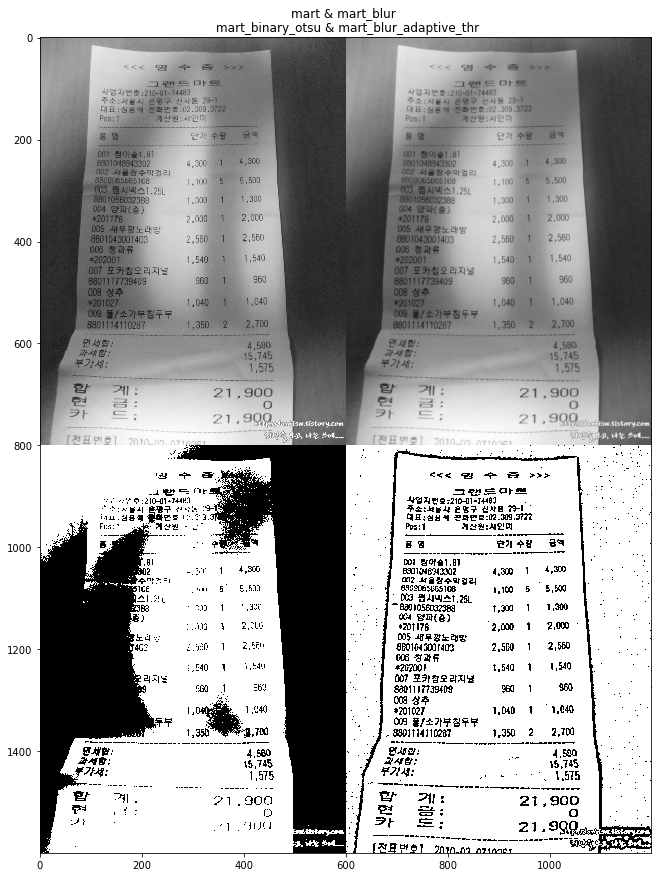

True

In [13]:
mart = cv2.imread('mart.jpg', 0)
_,mart_binary_otsu = cv2.threshold(mart, 0, 255, 
                                   cv2.THRESH_BINARY + cv2.THRESH_OTSU)

mart_blur = cv2.GaussianBlur(mart, (3,3), 0)
mart_blur_adaptive_thr = cv2.adaptiveThreshold(mart_blur, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 21, 4.5)   # 21은 블록의 사이즈로 수치가 클수록 사진을 더 잘게 나눔
                                                          # 2는 Gaussian의 평균을 2만큼 뺀 값으로 삼겠다는 것
plt.figure(figsize=(15,15))
imshow("mart & mart_blur \n mart_binary_otsu & mart_blur_adaptive_thr", 
       np.hstack([
           np.vstack([mart, mart_binary_otsu]),
           np.vstack([mart_blur, mart_blur_adaptive_thr])
       ])
      )

cv2.imwrite("output.jpg", np.hstack([mart, mart_blur_adaptive_thr]))

<img src='output.jpg' width=500>

---

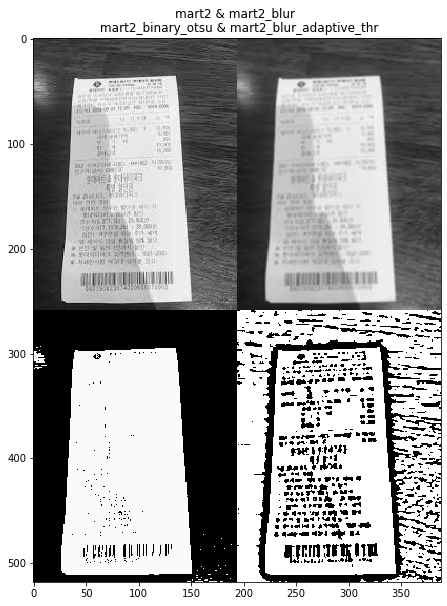

In [14]:
mart2 = cv2.imread('mart2.jpg', 0)
_, mart2_binary_otsu = cv2.threshold(mart2, 0, 250,
                                  cv2.THRESH_BINARY + cv2.THRESH_OTSU)

mart2_blur = cv2.GaussianBlur(mart2, (3,3), 0)
mart2_blur_adaptive_thr = cv2.adaptiveThreshold(mart2_blur, 255, 
                                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                               cv2.THRESH_BINARY, 21, 5)

plt.figure(figsize=(10,10))
imshow("mart2 & mart2_blur \n mart2_binary_otsu & mart2_blur_adaptive_thr", 
       np.hstack([
           np.vstack([mart2, mart2_binary_otsu]),
           np.vstack([mart2_blur, mart2_blur_adaptive_thr])
       ])
      )

## 외곽선 찾기 & 그리기 : findContours(), drawContours()
OpenCV에서 contours를 찾고, 그리기 위해서 아래 2개의 함수를 사용합니다.

### cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) → contours, hierarchy
Parameters:	
- **image** : 8-bit single-channel image. binary image.
- **mode** : contours를 찾는 방법
    - *cv2.RETR_EXTERNAL* : contours line중 가장 바깥쪽 Line만 찾음.
    - *cv2.RETR_LIST* : 모든 contours line을 찾지만, hierachy 관계를 구성하지 않음.
    - *cv2.RETR_CCOMP* : 모든 contours line을 찾으며, hieracy관계는 2단계로 구성함.
    - *cv2.RETR_TREE* : 모든 contours line을 찾으며, 모든 hieracy관계를 구성함.
- **method** : contours를 찾을 때 사용하는 근사치 방법
    - *cv2.CHAIN_APPROX_NONE* : 모든 contours point를 저장.
    - *cv2.CHAIN_APPROX_SIMPLE* : contours line을 그릴 수 있는 point 만 저장. (ex; 사각형이면 4개 point)
    - *cv2.CHAIN_APPROX_TC89_L1* : contours point를 찾는 algorithm
    - *cv2.CHAIN_APPROX_TC89_KCOS* : contours point를 찾는 algorithm
    
returns :
- contours : 각각의 point들의 list의 list형태. 예를 들어, 사각형은 하나의 contours line을 구성하기 때문에 len(contours) = 1. 값은 사각형의 꼭지점 좌표.
- hierarchy : contours line의 계층 구조([See this page](https://docs.opencv.org/trunk/d9/d8b/tutorial_py_contours_hierarchy.html))

### cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) → dst
Parameters:	
- **image** : 원본 이미지(grayscale이면 안됌!!!)
- **contours** : contours정보.
- **contourIdx** : contours list type에서 몇번째 contours line을 그릴 것인지. -1 이면 전체
- **color** : contours line color
- **thickness** : contours line의 두께. 음수이면 contours line의 내부를 채움.

Returns : image에 contours가 그려진 결과



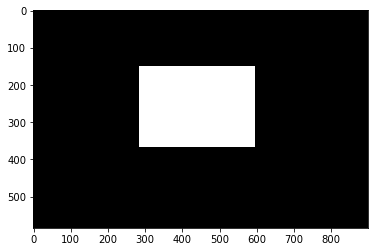

([array([[[285, 149]],

       [[285, 367]],

       [[593, 367]],

       [[593, 149]]], dtype=int32)], array([[[-1, -1, -1, -1]]], dtype=int32))
[array([[[285, 149]],

       [[285, 367]],

       [[593, 367]],

       [[593, 149]]], dtype=int32)]


In [15]:
shape4 = cv2.imread('shape4.png',0)
shape4_thr, shape4_mask = cv2.threshold(shape4,0,255,
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("", shape4_mask)

## 외곽정보를 찾아주는 함수 findContours
shape4_contours, _ = cv2.findContours(shape4_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 꼭지점들의 좌표
print(cv2.findContours(shape4_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE))
print(shape4_contours)   # 외곽선을 찾아서 중요지점들을 알려줌



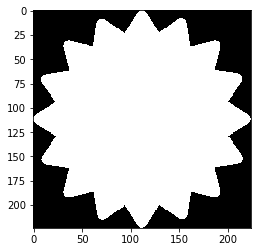

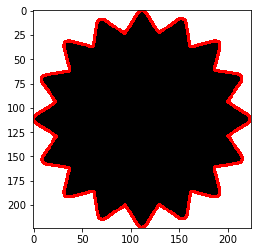

In [16]:
shape5 = cv2.imread('shape5.png',0)

shape5_thr, shape5_mask = cv2.threshold(shape5,0,255,
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)

shape5_mask = 255 - shape5_mask # 색 반전시켜줌

imshow("", shape5_mask)

## 외곽정보를 찾아주는 함수 findContours
shape5_contours, _ = cv2.findContours(shape5_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Approximation을 시켜서 불필요한 점은 뺀거

## 외곽선을 그려주는 함수 drawContours
shape5 = cv2.imread('shape5.png')     # drawcontours에서는 image가 gratscale면 안됌!
cv2.drawContours(shape5, shape5_contours, -1, (0,0,255), 2)   # (255, 0, 0) --> 파란색,   2:파란선 굵기
imshow("", shape5)

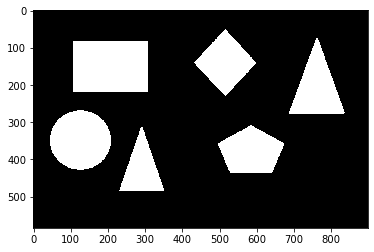

contours 총 개수 = 6


shape = 240
shape = 300
shape = 226
shape = 4
shape = 298
shape = 56


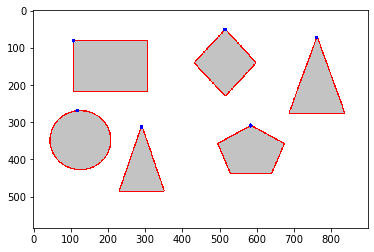

In [17]:
shape3 = cv2.imread('shape3.png')
shape3_gray = cv2.cvtColor(shape3, cv2.COLOR_BGR2GRAY)
shape3_thr, shape3_mask = cv2.threshold(shape3_gray, 0, 255,
                          cv2.THRESH_BINARY+cv2.THRESH_OTSU)
shape3_mask = 255 - shape3_mask

imshow("", shape3_mask)

## 외곽정보를 찾아주는 함수 findContours
shape3_contours, _ = cv2.findContours(shape3_mask, 
                               cv2.RETR_EXTERNAL, 
                               cv2.CHAIN_APPROX_SIMPLE)  # Approximation을 시켜서 불필요한 점은 뺀거

print(f"contours 총 개수 = {len(shape3_contours)}")
print('\n')


for con in shape3_contours : 
    print(f"shape = {len(con)}")
    x = con[0][0][0]      # con[0][0] : contour의 시작점
    y = con[0][0][1]
    cv2.drawContours(shape3, [con], -1, (0,0,255), 2)
    cv2.circle(shape3, (x,y), 5, (255,0,0), -1) # contour의 시점=종점 표시, 5 : radius, -1 : circle 안 채우기


imshow("", shape3)

## contour의 길이

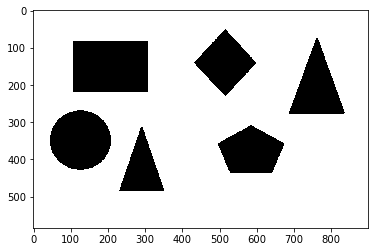

shape = 6
shape = 240 length = 513.7056245803833, approx = 3
shape = 300 length = 515.9310202598572, approx = 5
shape = 226 length = 531.8721435070038, approx = 8
shape = 4 length = 672.0, approx = 4
shape = 298 length = 616.7178171873093, approx = 3
shape = 56 length = 493.0336227416992, approx = 4


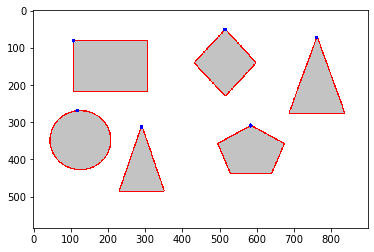

In [18]:
shape3 = cv2.imread('shape3.png')
shape3_gray = cv2.cvtColor(shape3, cv2.COLOR_BGR2GRAY)
shape3_thr, shape3_mask = cv2.threshold(shape3_gray, 0, 255,
                          cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imshow("", shape3_mask)
shape3_mask = 255 - shape3_mask


## 외곽정보를 찾아주는 함수 findContours
shape3_contours, _ = cv2.findContours(shape3_mask, 
                               cv2.RETR_EXTERNAL, 
                               cv2.CHAIN_APPROX_SIMPLE)  # Approximation을 시켜서 불필요한 점은 뺀거

print(f"shape = {len(shape3_contours)}")


for con in shape3_contours : 
    peri = cv2.arcLength(con, True)  # True는 폐곡선으로 하겠다, False는 그냥 원래 곡선으로 하겠다.
    approx = cv2.approxPolyDP(con, 0.02*peri, True)  # 다각형으로 근사 # 0.02*peri : epsilon값이 작을 수록 원래 이미지에 근사
    
    print(f"shape = {len(con)} length = {peri}, approx = {len(approx)}")
    x = con[0][0][0]      # con[0][0] : contour의 시작점
    y = con[0][0][1]
    cv2.drawContours(shape3, [con], -1, (0,0,255), 2)
    cv2.circle(shape3, (x,y), 5, (255,0,0), -1)

# image = cv2.imread("shape3.png")
# cv2.drawContours(gray, contours, -1, (255,0,0), 2)

imshow("", shape3)

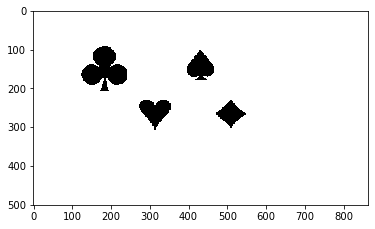

shape = 4
shape = 160 length = 313.53910398483276, appox = 9
shape = 184 length = 270.5096664428711, appox = 4
shape = 124 length = 312.56854152679443, appox = 9
shape = 270 length = 582.634556889534, appox = 15


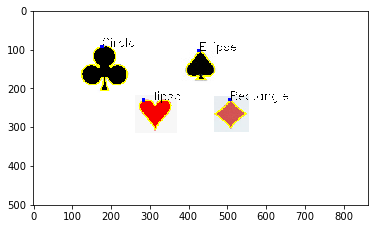

In [19]:
trumph = cv2.imread('trumph.png')
trumph_gray = cv2.cvtColor(trumph, cv2.COLOR_BGR2GRAY)
trumph_thr, trumph_mask = cv2.threshold(trumph_gray, 0, 255,
                          cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imshow("", trumph_mask)
trumph_mask = 255 - trumph_mask


## 외곽정보를 찾아주는 함수 findContours
trumph_contours, _ = cv2.findContours(trumph_mask, 
                               cv2.RETR_EXTERNAL, 
                               cv2.CHAIN_APPROX_SIMPLE)  # Approximation을 시켜서 불필요한 점은 뺀거

print(f"shape = {len(trumph_contours)}")


for con in trumph_contours : 
    peri = cv2.arcLength(con, True) # True는 폐곡선으로 하겠다, False는 그냥 원래 곡선으로 하겠다.
    approx = cv2.approxPolyDP(con, 0.02*peri, True)
    print(f"shape = {len(con)} length = {peri}, appox = {len(approx)}")
    
#     x = con[0][0][0]      # con[0][0] : contour의 시작점
#     y = con[0][0][1]
    p = tuple(con[0][0])
    cv2.drawContours(trumph, [con], -1, (0,255,255), 2)
    cv2.circle(trumph, p, 5, (255,0,0), -1)

    area = cv2.contourArea(con)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    if len(approx) == 3:
        cv2.putText(trumph, "Triangle", p, font, 1, (0))
    elif len(approx) == 4:
        cv2.putText(trumph, "Rectangle", p, font, 1, (0))
    elif len(approx) == 5:
        cv2.putText(trumph, "Pentagon", p, font, 1, (0))
    elif len(approx) < 15:
        cv2.putText(trumph, "Ellipse", p, font, 1, (0))
    else:
        cv2.putText(trumph, "Circle", p, font, 1, (0))
    

imshow("", trumph)





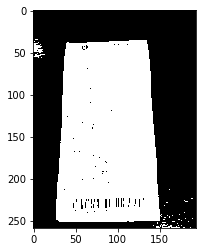

True

In [20]:
mart2 = cv2.imread('mart2.jpg')
mart2_gray = cv2.cvtColor(mart2, cv2.COLOR_BGR2GRAY)
mart2_thr, mart2_mask = cv2.threshold(mart2_gray, 127, 255, cv2.THRESH_BINARY)
# mart2_mask = 255 - mart2_mask
imshow("", mart2_mask)

cv2.imwrite("output2.png", mart2_mask)

---

### 침식(erosion), 팽창(dilation), 침식 후 팽창(open), 팽창 후 침식(closed)

[See this page for the details](https://opencv-python.readthedocs.io/en/latest/doc/12.imageMorphological/imageMorphological.html)

1. **침식(erosion)** : 각 Pixel에 structuring element를 적용하여 하나라도 0이 있으면 대상 pixel을 제거하는 방법입니다. 아래 그림은 대상 이미지에 십자형 structuring element를 적용한 결과 입니다.
    1. 사용한 커널의 크기에 따라  오브젝트 외곽에서 0이 되는 픽셀의 정도가 달라집니다. (https://webnautes.tistory.com/1257)
    2. 커널의 크기를 특정 크기(3, 3)으로 고정하고  Erosion 반복 횟수를 증가시켜서도 오브젝트 외곽에서 0이 되는 픽셀의 정도를 조절할 수 있습니다.
2. **팽창(dilation)** : Erosion과 반대로 대상을 확장한 후 작은 구멍을 채우는 방법입니다. Erosion과 마찬가지로 각 pixel에 structuring element를 적용합니다. 대상 pixel에 대해서 OR 연산을 수행합니다. 즉 겹치는 부분이 하나라도 있으면 이미지를 확장합니다.
3. **침식 후 팽창(open)** : Erosion적용 후 Dilation 적용. 작은 Object나 돌기 제거에 적합
<img src='open.png' width=500>
4. **팽창 후 침식(closed)** :Dilation적용 후 Erosion 적용. 전체적인 윤곽 파악에 적합
<img src='closed.png' width=500>
-----

### cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) → dst


Parameters:	
- **src** : 이미지. 채널 수는 아무 숫자나 가능. Depth는 CV_8U, CV_16U, CV_16S, CV_32F or CV_64F 중 하나여야 함.
- **op** : morphological operation 타입
    - *MORPH_ERODE* : 침식 
    - *MORPH_DILATE* : 팽창
    - *MORPH_OPEN* : 침식 후 팽창 an opening operation
    - *MORPH_CLOSE* : 팽창 후 침식 a closing operation
    - *MORPH_GRADIENT* : a morphological gradient. Dilation과 erosion의 차이.
    - *MORPH_TOPHAT* : “top hat”. Opeining과 원본 이미지의 차이
    - *MORPH_BLACKHAT* : “black hat”. Closing과 원본 이미지의 차이
- **kernel** : structuring element. cv2.getStructuringElement() 함수로 만들 수 있음.
- **anchor** : structuring element(kernel)의 중심. default (-1,-1)로 중심점.(안쓰면 생략)
- **iterations** : erosion and dilation 적용 반복 횟수
-----------
(잘 안쓰는 Parameters)
- **borderType** : Pixel extrapolation method. See borderInterpolate for details.
- **borderValue** : Border value in case of a constant border. The default value has a special meaning.

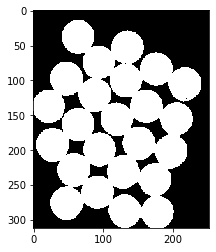

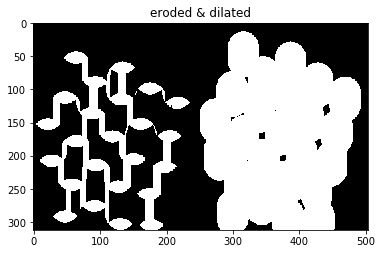

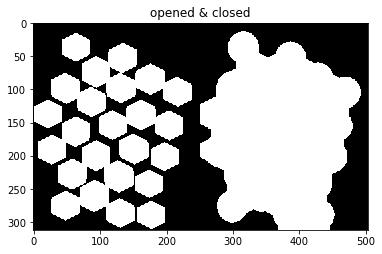

In [21]:
water_coins = cv2.imread('water_coins.jpg')
water_coins_gray = cv2.cvtColor(water_coins, cv2.COLOR_BGR2GRAY)
_, water_coins_binary = cv2.threshold(water_coins_gray, 127, 255, cv2.THRESH_BINARY)
water_coins_binary = 255 - water_coins_binary
imshow("", water_coins_binary)

# 침식
water_coins_eroded =  cv2.morphologyEx(water_coins_binary, cv2.MORPH_ERODE, (3,3), iterations=30)

# 팽창
water_coins_dilated = cv2.morphologyEx(water_coins_binary, cv2.MORPH_DILATE, (3,3), iterations = 20) 
imshow("eroded & dilated", np.hstack([water_coins_eroded, water_coins_dilated]))  # 표시하기



# 침식 후 팽창
water_coins_opened = cv2.morphologyEx(water_coins_binary, cv2.MORPH_OPEN,
                        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
                          iterations = 10)  # cv2.getStructuringElement()는 원하는 모양의 커널 얻고 싶을 때

# 팽창 후 침식
water_coins_closed = cv2.morphologyEx(water_coins_binary, cv2.MORPH_CLOSE,
                        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
                        iterations = 5) # cv2.getStructuringElement()는 원하는 모양의 커널 얻고 싶을 때

imshow("opened & closed", np.hstack([water_coins_opened, water_coins_closed]))

---

## blur 이후 [adaptivethreshold결과 VS 팽창 후 침식(closed)]

blur = (1, 1) & (3, 3)


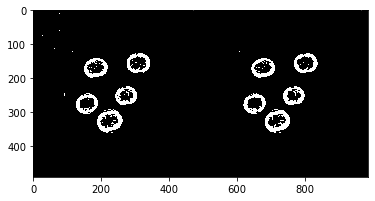

blur = (5, 5) & (7, 7)


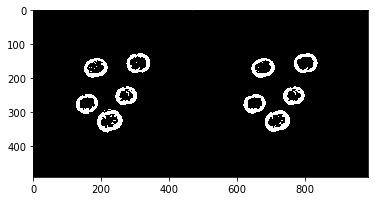

blur = (9, 9) & (11, 11)


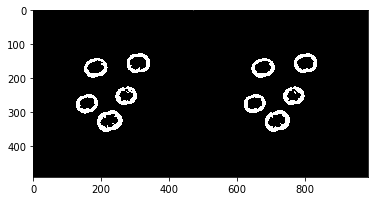

blur = (13, 13) & (15, 15)


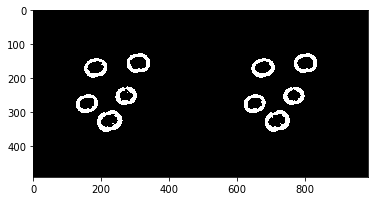

blur = (17, 17) & (19, 19)


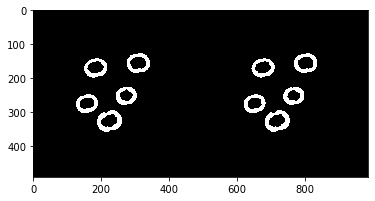

blur = (21, 21) & (23, 23)


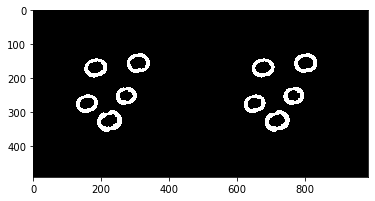

blur = (25, 25) & (27, 27)


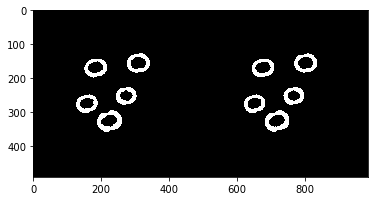

blur = (29, 29) & (31, 31)


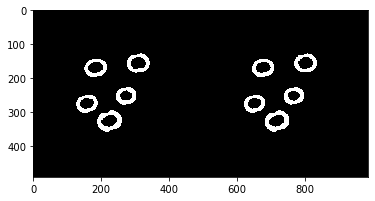

blur = (33, 33) & (35, 35)


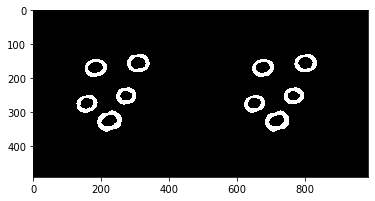

blur = (37, 37) & (39, 39)


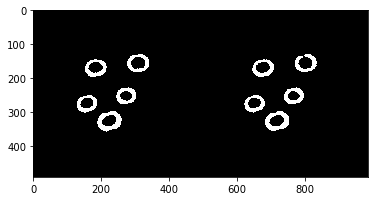

blur = (41, 41) & (43, 43)


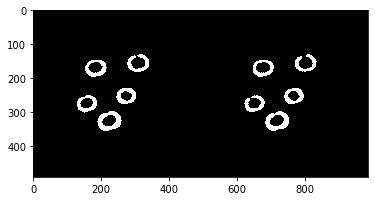

blur = (45, 45) & (47, 47)


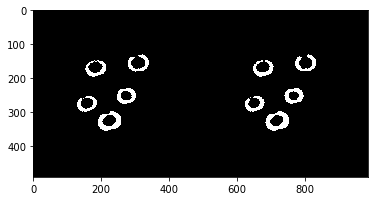

blur = (49, 49) & (51, 51)


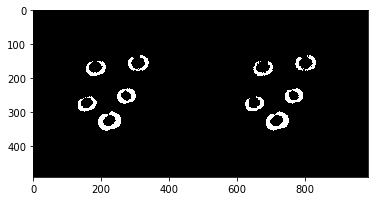

blur = (53, 53) & (55, 55)


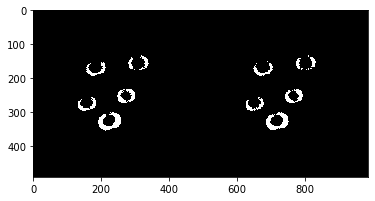

blur = (57, 57) & (59, 59)


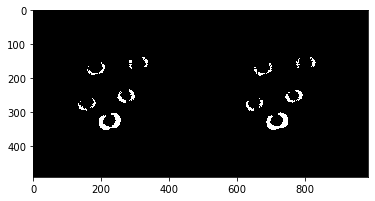

blur = (61, 61) & (63, 63)


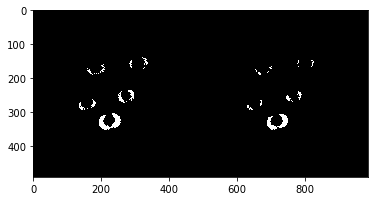

blur = (65, 65) & (67, 67)


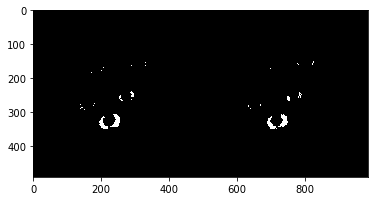

blur = (69, 69) & (71, 71)


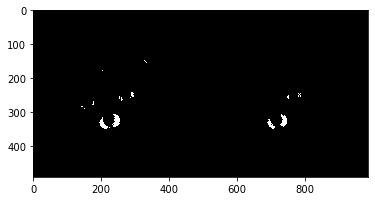

blur = (73, 73) & (75, 75)


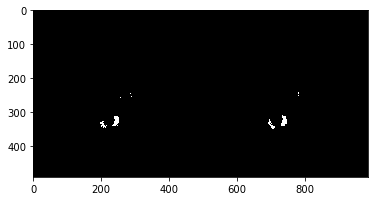

blur = (77, 77) & (79, 79)


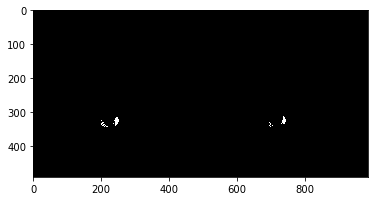

blur = (81, 81) & (83, 83)


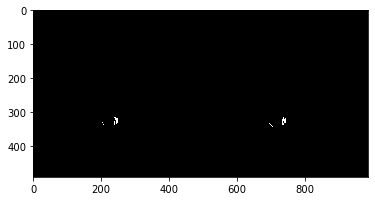

blur = (85, 85) & (87, 87)


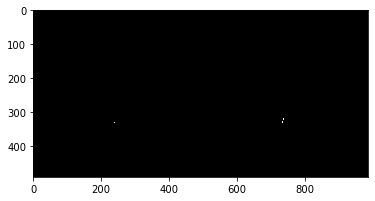

blur = (89, 89) & (91, 91)


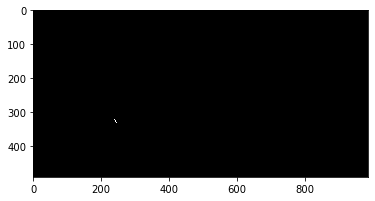

blur = (93, 93) & (95, 95)


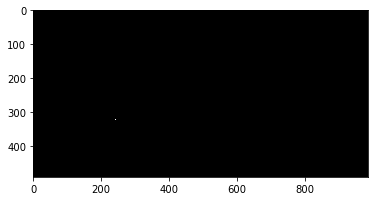

blur = (97, 97) & (99, 99)


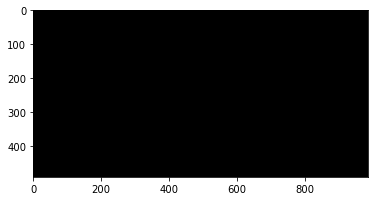

In [22]:
# blur 후 adaptivethreshold 적용

frame = cv2.imread("coin.png")
roi = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

for i in range(1,101, 4):
    print(f"blur = {(i,i)} & {(i+2, i+2)}")
    gray_blur = cv2.GaussianBlur(gray, (i,i), 0)
    gray_blur2 = cv2.GaussianBlur(gray, (i+2,i+2), 0)
    thresh_ad1 = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 45,6)   # THRESH_BINARY_INV에서 INV는 255-binary한 것임
    thresh_ad2 = cv2.adaptiveThreshold(gray_blur2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 45,6)   # THRESH_BINARY_INV에서 INV는 255-binary한 것임

    imshow("", np.hstack([thresh_ad1, thresh_ad2]))

In [23]:
# 팽창 후 침식(closed)
gray_blur_3 = cv2.GaussianBlur(gray, (3,3), 0)
thresh_3 = cv2.adaptiveThreshold(gray_blur_3, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 45,6)   # THRESH_BINARY_INV에서 INV는 255-binary한 것임
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh_3, cv2.MORPH_CLOSE, kernel, iterations=5)

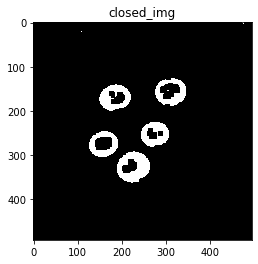

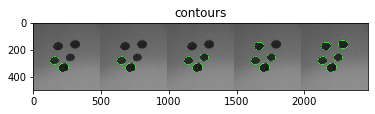

length of contours = 11
the number of closed curves = 5


In [25]:
# Gray로 바꾸고 Blur처리 해서 adaptivethreshold 적용하고 컨투어를 찾음
closed_img = closing.copy()   
imshow("closed_img", closed_img)


closed_contours,_ = cv2.findContours(closed_img, cv2.RETR_EXTERNAL,
                             cv2.CHAIN_APPROX_SIMPLE)       # 여기서 cont_img라는 카피본을 쓰는 이유는 findContours 함수가 적용 이후에
                                                            # 원본이 바뀌기 때문에(inplace=True 같은 느낌) 카피본을 씀
i = 0
roi = frame.copy()
for cnt in closed_contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:           # cv.ellipse는 적어도 5개의 점이 필요함
        continue
    
    ellipse = cv2.fitEllipse(cnt)  # 타원을 만들어주는 함수
    if i == 0:
        draw = cv2.ellipse(roi, ellipse, (0,255,0), 2)   # 타원을 그리는 함수  2: 타원의 두께
        i += 1
    else:
        new_draw = cv2.ellipse(roi, ellipse, (0,255,0), 2)   # 타원을 그리는 함수  2: 타원의 두께
        draw = np.hstack([draw, new_draw])
        i += 1


imshow("contours", draw)

    
print(f"length of contours = {len(closed_contours)}") # 원래 contours 안에 있는 contour 개수들
print(f"the number of closed curves = {i}" )


In [25]:
mart2_ = cv2.imread('mart2.jpg')
mart2_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
mart2_gray = cv2.medianBlur(mart2_gray, 21)
mart2_thr, mart2_mask = cv2.threshold(mart2_gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("", mart2_mask)

kernel = np.ones((5, 5), np.uint8)           
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=5)   
imshow("", closing)                                 

contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))    

print(  f"shape = {len(contours)}"  )


colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (255,0,255)]

maxArea = 0

for i in range(len(contours)) :        
    con = contours[i]
    peri = cv2.arcLength(con, True)
    area = cv2.contourArea(con)  
    approx = cv2.approxPolyDP(con, 0.02 * peri, True)    
    print(  f"shape={len(con)}  length={peri}  approx={len(approx)}   area={area}"  )    
    if area > maxArea  :
        maxArea = area
        maxContour = approx
    
cv2.drawContours(img, [maxContour], -1, (0,0,255), 20)
   
    
imshow("", img)
cv2.imwrite("output.jpg", img)

NameError: name 'img' is not defined

In [ ]:
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)
imshow("", closing)

In [ ]:
cont_img = closing.copy()   
contours,_ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
                             cv2.CHAIN_APPROX_SIMPLE)       # 여기서 cont_img라는 카피본을 쓰는 이유는 findContours 함수가 적용 이후에
                                                            # 원본이 바뀌기 때문에(inplace=True 같은 느낌) 카피본을 씀

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:   #원하는 모양(동전) 이외의 것 제외하기
        continue
    if len(cnt) < 5:          # 원의 경우 5보다 크기 때문에, 그 이하의 값을 제외
        continue
    ellipse = cv2.fitEllipse(cnt)  # 타원을 만들어주는 함수
    cv2.ellipse(roi, ellipse, (0,255,0), 2)   # 타원에 대한 함수  2: 타원의 굵기?

    
print(len(contours))
    
imshow("out", thresh)
imshow("out", cont_img)
imshow("out", roi)

---

## 책 찾기 (edge 찾기: [canny edge detection](https://blog.naver.com/samsjang/220507996391))

In [ ]:
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gassian_blur = cv2.GaussianBlur(gray, (3, 3), 0)


# cv2.Canny(***, minVal, maxVal)
# minVal보다 작으면 엣지 아니라고 판단
# maxVal보다 크면 확실한 엣지
# 그 사이는 판단함
edged1 = cv2.Canny(gray, 10, 250) # Canny : 외곽선 정보를 알려주는 함수(edge 추출 방법)
edged2 = cv2.Canny(gassian_blur, 10, 250) 

imshow('no_blur', edged1)
imshow('gaussian_blur', edged2)

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

imshow("", closed)

In [ ]:
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

# cv2.drawContours(image, cnts, -1, (0,0,255), 1)
# cv2.imwrite("output3.png")

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))
imshow("Output", image)

---

In [ ]:
from collections import Counter
c = Counter([0,0,0,5,2,2,3,4,5,6])
print(c.most_common())

c = Counter([0,0,0,255,255,0, 255])
print(c.most_common())

In [ ]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

In [ ]:
img = cv2.imread('stone.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# HoughCircles : 
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=100, param2=30,
                           minRadius=10, maxRadius=50)
# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨 (edge의 문턱값)
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨 (값이 크면 진짜 원만 검출함)

print(circles)

In [ ]:
circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (x, y), int(r*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (x, y), int(r*0.7), (255, 255, 255), -1)            


imshow("", img)

In [ ]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold


img = cv2.imread('stone2.jpg')
img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,
                           1, 20, param1=100, param2=30, 
                           minRadius=10, maxRadius=50)

print(circles)


circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i    
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
    
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (x, y),int(r*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (x, y), int(r*0.7), (255, 255, 255), -1)            


imshow("", img)

---

In [ ]:
img = cv2.imread('coin.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# HoughCircles : 
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=100, param2=30,
                           minRadius=10, maxRadius=50)
# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨 (edge의 문턱값)
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨 (값이 크면 진짜 원만 검출함)

print(circles)

circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
#     crop_img = img[y - r:y + r, x - r:x + r]    
#     txt, threshold = detect_weiqi(crop_img)
    
#     if txt == 'black' :  
#         cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
#     else :
#         cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)

---

In [ ]:
img = cv2.imread('water_coins.jpg')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# HoughCircles : 
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=100, param2=30,
                           minRadius=10, maxRadius=50)
# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨 (edge의 문턱값)
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨 (값이 크면 진짜 원만 검출함)

print(circles)

circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
#     crop_img = img[y - r:y + r, x - r:x + r]    
#     txt, threshold = detect_weiqi(crop_img)
    
#     if txt == 'black' :  
#         cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
#     else :
#         cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)

---